In [12]:
### ATOC7500 Lecture #5 - estimate_effective_sample_size
### coded by Prof. Jennifer Kay (University of Colorado)
### last updated September 16, 2020
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats

In [13]:
import os #change directory to where there is data, not local GitHub repo
os.chdir('/Users/chwy8767/Google Drive/ATOC_7500_Data_Analysis/2_Regression_corr/L5')
filename = 'ATOC_wxobs20200907-20200908.csv'
data=pd.read_csv(filename,sep=',')

In [15]:
data

Date    Time  Temp_F  RH_percent  DewTemp_F  WindSpeed_mph  SLP_mb
0     9/6/20  12:05a    78.2          15       26.7             13   841.7
1     9/6/20  12:10a    78.2          15       26.7             12   841.7
2     9/6/20  12:15a    78.1          15       26.7             13   841.7
3     9/6/20  12:20a    78.1          14       25.0             14   841.7
4     9/6/20  12:25a    78.2          15       26.7             14   841.6
...      ...     ...     ...         ...        ...            ...     ...
1145  9/8/20  11:35p    31.8          95       30.5              0   846.7
1146  9/8/20  11:40p    31.9          95       30.6              0   846.5
1147  9/8/20  11:45p    31.9          95       30.6              0   846.7
1148  9/8/20  11:50p    31.9          95       30.6              0   846.5
1149  9/8/20  11:55p    32.0          95       30.7              0   847.0

[1150 rows x 7 columns]

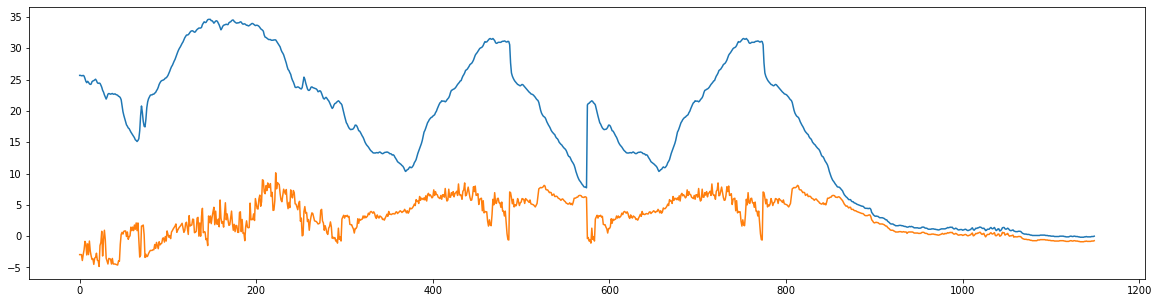

In [39]:
plt.figure(figsize=[20,5])
plt.plot((data['Temp_F']-32)*(5/9))
plt.plot((data['DewTemp_F']-32)*(5/9))

Sample Size N = 12
Mean Temperature 65.9
Standard Deviation in Temperature 19.7


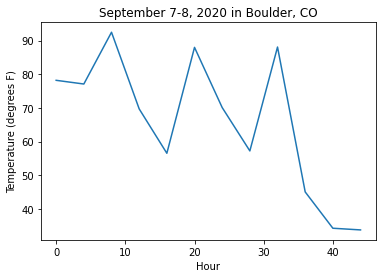

In [35]:
## Look at data
foo=data['Temp_F']
tseries=foo[::24*4] ## take the temperature every three hours
hours=np.arange(0,48,4)

plt.plot(hours,tseries)
plt.title('September 7-8, 2020 in Boulder, CO')
plt.ylabel('Temperature (degrees F)')
plt.xlabel('Hour')
N=len(tseries)
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
print('Sample Size N =',N)
print('Mean Temperature',round(mean,1))
print('Standard Deviation in Temperature',round(sigma,1))

**Note when using every 1 hour there are only 2 independent samples, for every 4 hours there is a difference between the two tests used at the end but not with 3**

<span style="font-size:1.5em;">
Eq 88 $N^* = \frac{1-\rho (\Delta t)} {1+\rho (\Delta t)}$   <br><br>  Eq 90 $N^* = \frac{-ln(a)}{2}$

In [36]:
## Estimate lag-1 autocorrelation
lag=1
t1_m=tseries[0:-1*lag]-mean
t2_m=tseries[lag:]-mean

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
AR1_np=np.correlate(t1_m,t2_m,mode='valid')/(N-lag)/(sigma**2)
print('np.correlate AR1:',round(AR1_np[0],5))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
AR1=np.dot(t1_m,t2_m)/(N-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('direct calculation AR1:',round(AR1,5))

#now calculate effective sample size
Nstar_wilks=round(((1-AR1)/(1+AR1))*N) ## Barnes Chapter 2 eq. 88
Nstar_leith=round((-0.5*np.log(AR1))*N) ## Barnes Chapter 2 eq. 90
print('Sample Size:',N)
print('Effective Sample Size Wilks (#independent samples):',Nstar_wilks)
print('Effective Sample Size Leith (#independent samples):',Nstar_leith)

np.correlate AR1: 0.32362
direct calculation AR1: 0.32362
Sample Size: 12
Effective Sample Size Wilks (#independent samples): 6
Effective Sample Size Leith (#independent samples): 7
